Things I need to change/check:

in $\texttt{constants.py}$:
- line 66: centre_str_band7 = 'J163135.656-240130.089'  
- line 110: PA_deg_sky_band7 = 139.5 
- line 121: StokesI_err_mJy_band7 = np.mean([0.0646, 0.0580, 0.0636, 0.056])
- line 122: StokesQ_err_mJy_band7 = np.mean([0.0317, 0.0311, 0.0398, 0.034]) # These values are from CASA 
- line 123: StokesU_err_mJy_band7 = np.mean([0.0247, 0.0249, 0.0255, 0.024]) # These values are from CASA 
- line 134: step_band7 = 7


in $\texttt{load_band7_data.py}$:
- line 68: StokesQ_err_mJy = np.full((ny, nx), constants.StokesQ_err_mJy_band7)
- line 80: StokesU_err_mJy = np.full((ny, nx), constants.StokesQ_err_mJy_band7)
- line 121: POLI_mJy = POLI_calc
- line 122: PA_rad = PA_calc_rad
- line 131: vector_len_pix_band7 = vector_len_pix_band4

In [1]:
%run constants.py

In [2]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FUNCTIONS/load_functions"

In [3]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FITS FILES/BAND7/load_band7_data.py"

In [4]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/CARTA FILES/BAND7/load_carta_data_band7.py"

# Find Peak POLI and get POLF

In [5]:
# Find index of max POLI_mJy, ignoring NaNs
y_max, x_max = np.unravel_index(np.nanargmax(POLI_mJy), POLI_mJy.shape)

# Get max POLI_mJy value
max_POLI = POLI_mJy[y_max, x_max]

# Get corresponding Stokes I value at same position
corresponding_I = StokesI_mJy[y_max, x_max]

# Compute calculated polarization fraction
calc_avg_POLF = max_POLI / corresponding_I 

# Get map POLF value
map_avg_POLF = POLF[y_max, x_max]

# Print results
print(rf'The maximum POLI value is {max_POLI:.3f}, and it happens at the index ({y_max}, {x_max})')
print(rf'At that index, the StokesI value is {corresponding_I:.3f}')
print(rf'At that index, the calculated POLF value is {calc_avg_POLF:.4f} or {calc_avg_POLF* 100:.4f}%')
print(rf'At that index, the map POLF value is {map_avg_POLF:.4f}')

The maximum POLI value is 1.668, and it happens at the index (268, 271)
At that index, the StokesI value is 157.993
At that index, the calculated POLF value is 0.0106 or 1.0556%
At that index, the map POLF value is 0.0106


# Stokes I and Polarized Intensity Plot with Vectors

In [6]:
len(vector_angle_actual_sky)

2454

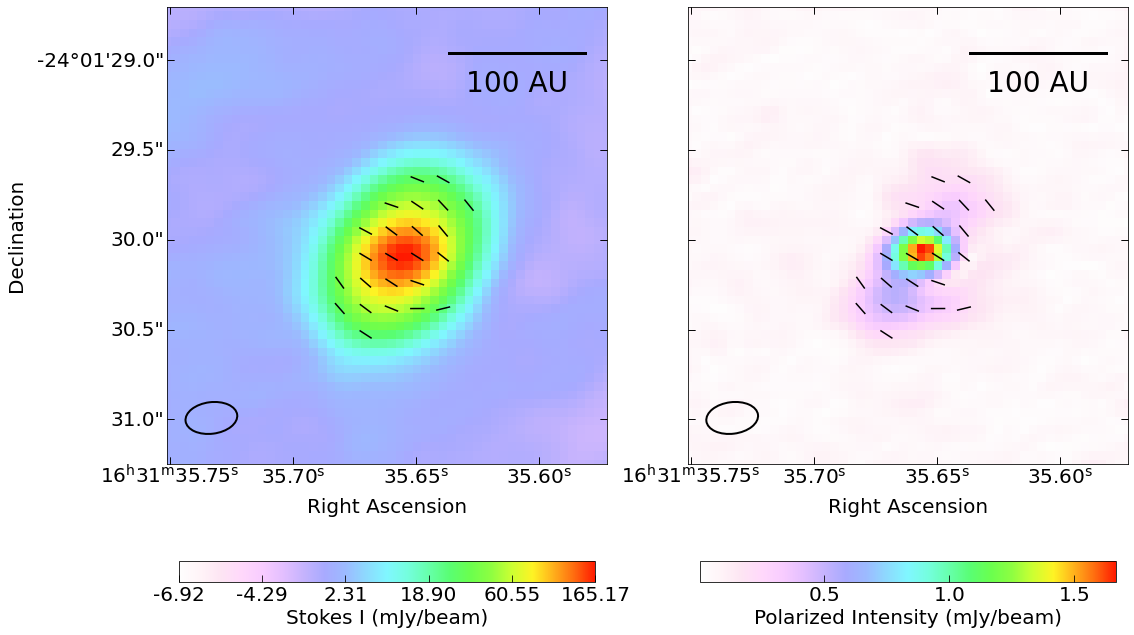

In [7]:
fig, ax = create_stokes_i_plus_one_base_plot(StokesI_wcs, StokesI_stretched_mJy, 
                                             normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                                             POLI_mJy, 'Polarized Intensity (mJy/beam)',
                                             soft_colormap_v2, 
                                             xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                             BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                             max_length_pix, reference_fraction)

for row in vector_data_actual_cartesian:
    ax[0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
    
for row in vector_data_actual_cartesian:
    ax[1].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
    
    
plt.savefig(writeup_image_folder_path + "IRS63_StokesI_POLI_vectors_BAND7.pdf", 
            dpi=300, 
            bbox_inches='tight')    
 

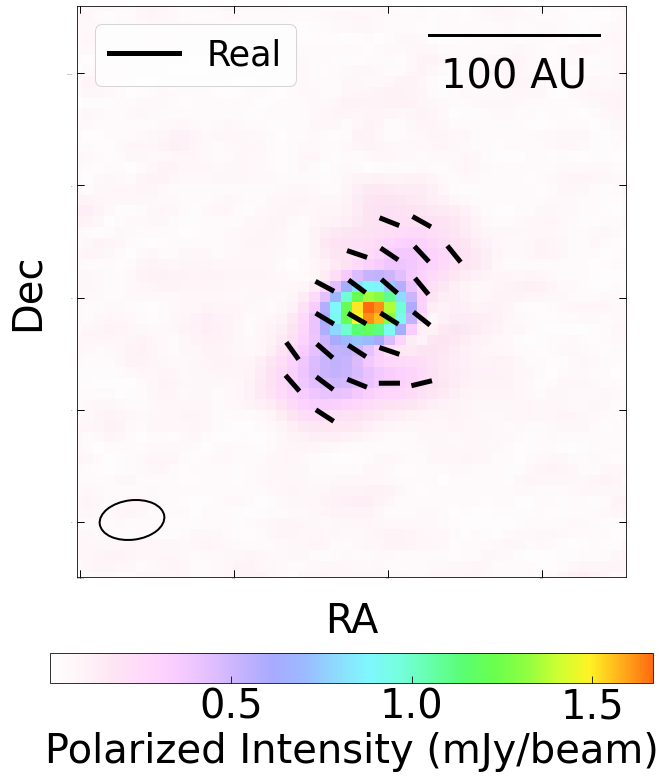

In [8]:
fig, ax = create_base_plot(StokesI_wcs, 
                           POLI_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction,
                           cbar_fs = 40,
                           axis_label_fs = 40,
                           axis_num_fs = 21,
                           cbar_orientation = 'horizontal',
                           cbar_pad = 0.1,
                           cbar_shrink = 0.9,
                           fig_size_x = 12,
                           fig_size_y = 14,
                           text_fs = 40,
                           y_label = True, y_num = False,
                           x_label = True, x_num = False, 
                           full_axis_labels = False,
                           cbar_num_fs = 40,
                           line_y_frac = 0.05)


first_real = True
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    

ax.legend(fontsize = 35,
         loc = 'upper left')


plt.savefig(slideshow_image_folder_path + "IRS63_POLI_BAND7_slides.jpeg", 
            dpi=300, 
            bbox_inches='tight')  

# Slices Along Major and Minor Axes

In [9]:
# major_data_StokesI, major_offset_arcsec_StokesI, minor_data_StokesI, minor_offset_arcsec_StokesI, slices_points = run_slices(StokesI_mJy, 
#                                                                                                                              StokesI_header,
#                                                                                                                              StokesI_wcs,
#                                                                                                                              carta_major_data_mJy_StokesI, 
#                                                                                                                              carta_minor_data_mJy_StokesI,
#                                                                                                                              carta_minor_offset_StokesI,
#                                                                                                                              carta_major_offset_StokesI,
#                                                                                                                              band = 7,
#                                                                                                                              print_statement = False)

In [10]:
# major_data_POLI, major_offset_arcsec_POLI, minor_data_POLI, minor_offset_arcsec_POLI, _ = run_slices(POLI_mJy, 
#                                                                                                      StokesI_header,
#                                                                                                      StokesI_wcs, 
#                                                                                                      carta_major_data_mJy_POLI,
#                                                                                                      carta_minor_data_mJy_POLI,
#                                                                                                      carta_minor_offset_POLI,
#                                                                                                      carta_major_offset_POLI,
#                                                                                                      band = 7,
#                                                                                                      print_statement = False)

In [11]:
# major_data_POLF, major_offset_arcsec_POLF, minor_data_POLF, minor_offset_arcsec_POLF, _ = run_slices(POLF, 
#                                                                                                      StokesI_header,
#                                                                                                      StokesI_wcs, 
#                                                                                                      carta_major_data_POLF,
#                                                                                                      carta_minor_data_POLF,
#                                                                                                      carta_minor_offset_POLF,
#                                                                                                      carta_major_offset_POLF,
#                                                                                                      band = 7,
#                                                                                                      print_statement = False)

In [12]:
# data_dict = {
#     "StokesI_major"         : major_data_StokesI,
#     "StokesI_offset_major": major_offset_arcsec_StokesI,
#     "StokesI_minor"         : minor_data_StokesI,
#     "StokesI_offset_minor": minor_offset_arcsec_StokesI
# }

# # Convert to DataFrame
# df = pd.DataFrame(data_dict)

# # Save to CSV
# df.to_csv(band7_carta_folder_path + "IRS63_my_slice_StokesI_BAND7.csv", index=False)

In [13]:
# data_dict = {
#     "POLI_major"         : major_data_POLI,
#     "POLI_offset_major": major_offset_arcsec_POLI,
#     "POLI_minor"         : minor_data_POLI,
#     "POLI_offset_minor": minor_offset_arcsec_POLI
# }

# # Convert to DataFrame
# df = pd.DataFrame(data_dict)

# # Save to CSV
# df.to_csv(band7_carta_folder_path + "IRS63_my_slice_POLI_BAND7.csv", index=False)

In [14]:
# data_dict = {
#     "POLF_major"         : major_data_POLF,
#     "POLF_offset_major"  : major_offset_arcsec_POLF,
#     "POLF_minor"         : minor_data_POLF,
#     "POLF_offset_minor"  : minor_offset_arcsec_POLF
# }

# # Convert to DataFrame
# df = pd.DataFrame(data_dict)

# # Save to CSV
# df.to_csv(band7_carta_folder_path + "IRS63_my_slice_POLF_BAND7.csv", index=False)

In [15]:
# major_x, major_y, minor_x, minor_y = slices_points

In [16]:
# fig, ax = create_base_plot(StokesI_wcs, POLI_mJy, 'Polarized Intensity (mJy/beam)', soft_colormap_v2, 
#                            xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
#                            BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
#                            max_length_pix, reference_fraction)

# ax.scatter(major_x, 
#            major_y, 
#            label = 'Major Axis Slice',
#            color  = 'blue')

# ax.scatter(minor_x, 
#            minor_y, 
#            label = 'Minor Axis Slice',
#            color = 'red')

# ax.legend(fontsize = legend_text_fs, loc = 'upper left')

In [17]:
# fig, ax = create_base_plot(StokesI_wcs, 
#                            POLI_mJy, 'Polarized Intensity (mJy/beam)', 
#                            soft_colormap_no_red, 
#                            xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
#                            BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
#                            max_length_pix, reference_fraction,
#                            cbar_fs = 23,
#                            axis_label_fs = 25,
#                            axis_num_fs = 21,
#                            cbar_orientation = 'horizontal',
#                            cbar_pad = 0.1,
#                            cbar_shrink = 0.9,
#                            fig_size_x = 12,
#                            fig_size_y = 14)


# ax.scatter(major_x, 
#            major_y, 
#            label = 'Major',
#            color  = 'blue')

# ax.scatter(minor_x, 
#            minor_y, 
#            label = 'Minor',
#            color = 'red')

# ax.legend(fontsize = 30, loc = 'upper left')


# plt.savefig(slideshow_image_folder_path + "IRS63_minor_major_slices_BAND7_slides.jpeg", 
#             dpi=300, 
#             bbox_inches='tight')  


In [18]:
# ax = plot_slices_along_axes(
#     major_data_StokesI,
#     minor_data_StokesI,
#     carta_major_data_mJy_StokesI,
#     carta_minor_data_mJy_StokesI,
#     major_offset_arcsec_StokesI,
#     minor_offset_arcsec_StokesI,
#     carta_major_offset_StokesI,
#     carta_minor_offset_StokesI,
#     BMAJ_deg, BMIN_deg, 
#     y_label="Stokes I (mJy/beam)",
#     type_of_plot="Line",  # or "Scatter",
#     cb_friendly = False,
#     vline = True,
#     fit_slices = True
# )

# plt.savefig(image_folder_path + "IRS63_StokesI_slice_BAND7.pdf", 
#             dpi=300, 
#             bbox_inches='tight')


In [19]:
# ax = plot_slices_along_axes(
#     major_data_POLI,
#     minor_data_POLI,
#     carta_major_data_mJy_POLI,
#     carta_minor_data_mJy_POLI,
#     major_offset_arcsec_POLI,
#     minor_offset_arcsec_POLI,
#     carta_major_offset_POLI,
#     carta_minor_offset_POLI,
#     BMAJ_deg, BMIN_deg, 
#     y_label="Polarized Intensity (mJy/beam)",
#     type_of_plot="Line",  # "Line" or "Scatter",
#     cb_friendly = False,
#     vline = True,
#     fit_slices = True
# )

# plt.savefig(image_folder_path + "IRS63_POLI_slice_BAND7.pdf", 
#             dpi=300, 
#             bbox_inches='tight')    


In [20]:
# ax = plot_slices_along_axes(
#     major_data_POLF,
#     minor_data_POLF,
#     carta_major_data_POLF,
#     carta_minor_data_POLF,
#     major_offset_arcsec_POLF,
#     minor_offset_arcsec_POLF,
#     carta_major_offset_POLF,
#     carta_minor_offset_POLF,
#     BMAJ_deg, BMIN_deg, 
#     y_label="Polarized Fraction",
#     type_of_plot="Line",  # "Line" or "Scatter",
#     cb_friendly = False,
#     vline = True,
#     fit_slices = True
# )

# plt.savefig(image_folder_path + "IRS63_POLF_slice_BAND7.pdf", 
#             dpi=300, 
#             bbox_inches='tight') 


# Fitting the slices


$I(r) \propto r^\alpha$

Take log of both sides:
$\log_{10}(I(r))=\alpha \log_{10}(r)+C$

We need to comvert the data from mJy/beam to mJy/arcsec$^2$ (or radians will also work).

We can calculate the beam area with the equation:
$1.113 \cdot BMAJ \cdot BMIN$,
where $BMAJ$ and $BMIN$

# Ratio Models

In [21]:
vector_data_plotting_grid, vector_data_list_100U_to_100A, testing_vector_angles = ratio_model_band47(StokesQ_grid_100Uniform, StokesU_grid_100Uniform,
                                                                                           StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal,
                                                                                           ny, nx,
                                                                                           vector_length_pix_const,
                                                                                           POLI_mJy, POLI_err_mJy, 
                                                                                           PA_err_deg,
                                                                                           'band 7'
                                                                                           # step = 10,
                                                                                           )

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


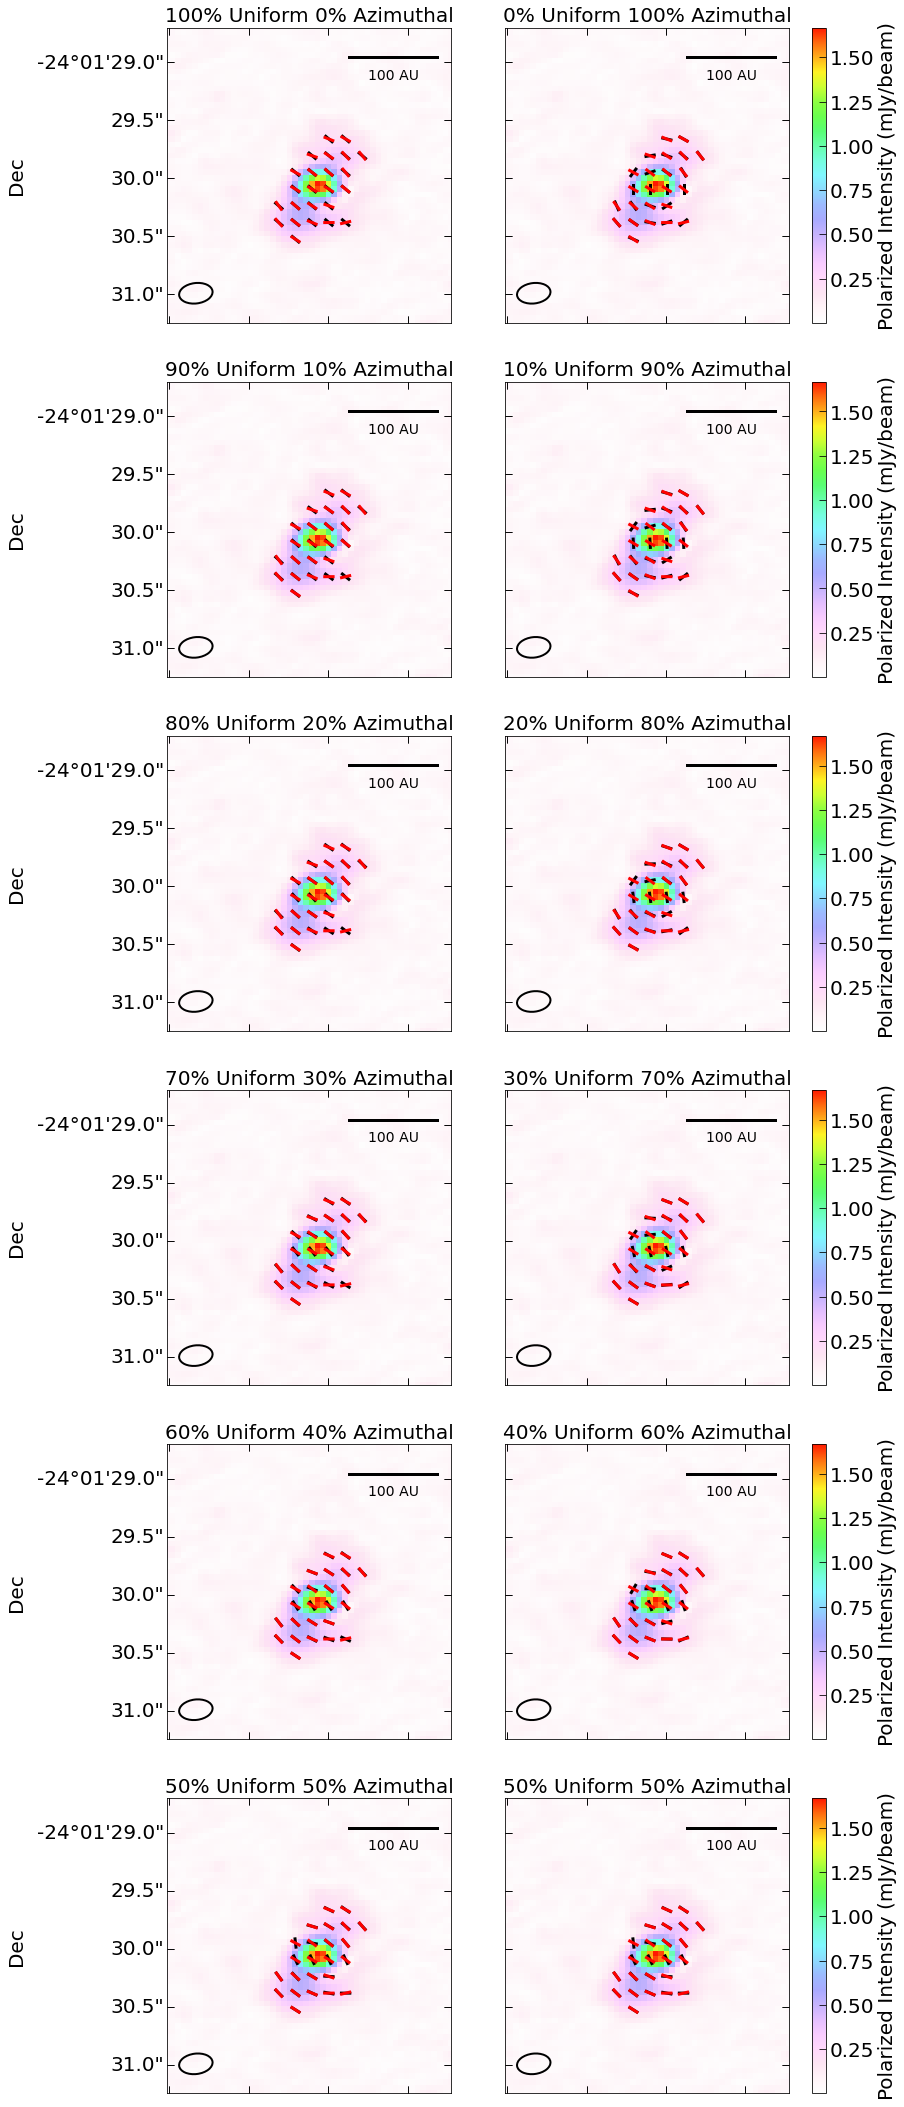

In [22]:
ax = plot_ratio_grid(POLI_mJy,
                    StokesI_wcs, soft_colormap_v2, 
                    xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                    BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                    max_length_pix, reference_fraction,
                    vector_data_actual_cartesian, vector_data_plotting_grid)

## Find the best one

In [23]:
min_index = find_best_fit_ratio_model(vector_angle_actual_sky, testing_vector_angles)

the length of chi_squared_values is : 11
Chi-squared values for ratio models:
  100 U 0 A: χ² = nan
  90 U 10 A: χ² = nan
  80 U 20 A: χ² = nan
  70 U 30 A: χ² = nan
  60 U 40 A: χ² = nan
  50 U 50 A: χ² = nan
  40 U 60 A: χ² = nan
  30 U 70 A: χ² = nan
  20 U 80 A: χ² = nan
  10 U 90 A: χ² = nan
  0 U 100 A: χ² = nan

Best-fit ratio model: 100 U 0 A (χ² = nan)


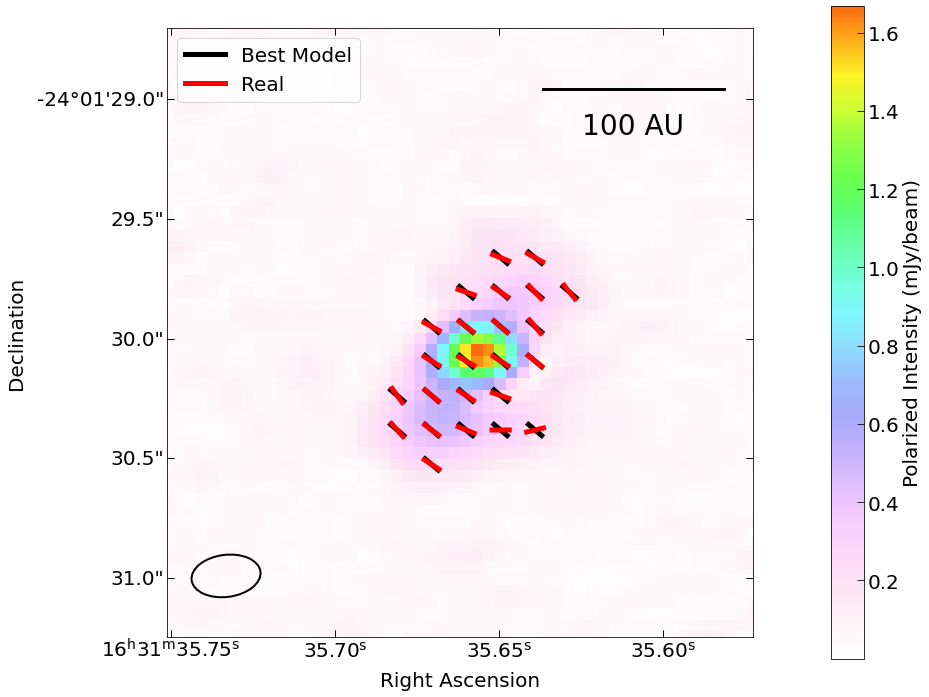

In [40]:
fig, ax = create_base_plot(StokesI_wcs, POLI_mJy, 'Polarized Intensity (mJy/beam)' , 
                           soft_colormap_no_red, 
                           xmin, xmax , ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Add vector plots (Best Model: black)
for i, row in enumerate(vector_data_list_100U_to_100A[min_index]):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, label='Best Model')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5)

# Plot actual vector data (Real: red)
for i, row in enumerate(vector_data_actual_cartesian):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, label='Real')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5)

# Show legend
ax.legend(fontsize=legend_title_fs, loc = 'best')



plt.savefig(writeup_image_folder_path + "IRS63_best_ratio_BAND7.pdf", 
            dpi=300, 
            bbox_inches='tight')   


In [25]:
-1.333333333333E-05* 3600

-0.047999999999988

In [26]:
StokesI_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  540                                                  
NAXIS2  =                  540                                                  
BMAJ    =   8.047502073977E-05                                                  
BMIN    =   4.888521300422E-05                                                  
BPA     =  -8.285957336426E+01                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'IRS63   '                                                            
BUNIT   = 'Jy/beam '           /Brightness (pixel) unit                         
RADESYS = 'ICRS    '                                                            
LONPOLE =   1.800000000000E+

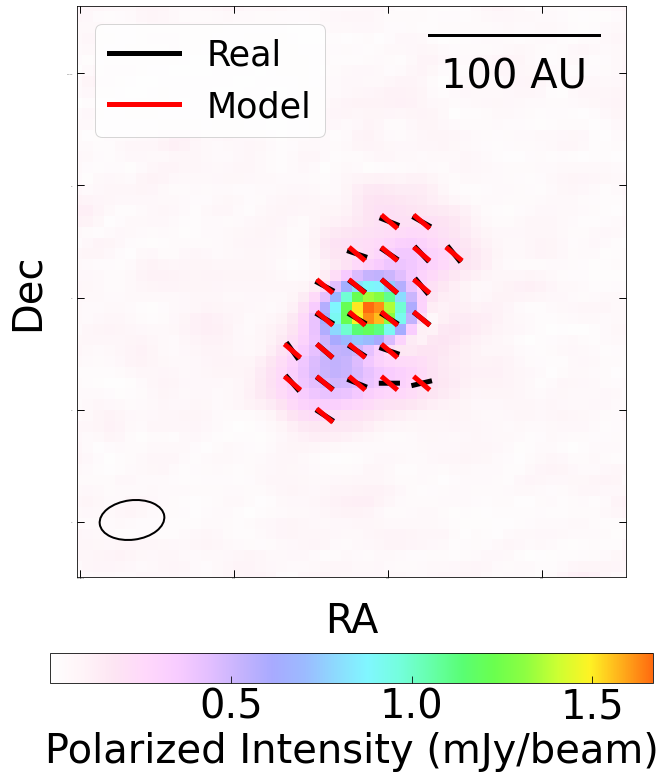

In [27]:
fig, ax = create_base_plot(StokesI_wcs, 
                           POLI_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction,
                           cbar_fs = 40,
                           axis_label_fs = 40,
                           axis_num_fs = 21,
                           cbar_orientation = 'horizontal',
                           cbar_pad = 0.1,
                           cbar_shrink = 0.9,
                           fig_size_x = 12,
                           fig_size_y = 14,
                           text_fs = 40,
                           y_label = True, y_num = False,
                           x_label = True, x_num = False, 
                           full_axis_labels = False,
                           cbar_num_fs = 40,
                           line_y_frac = 0.05)


first_real = True
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots (Best Model: black)
for i, row in enumerate(vector_data_list_100U_to_100A[min_index]):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, label='Model')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5)

ax.legend(fontsize = 35,
         loc = 'upper left')


plt.savefig(slideshow_image_folder_path + "IRS63_best_ratio_BAND7_slides.jpeg", 
            dpi=300, 
            bbox_inches='tight')  

# Gaussian Model 

In [28]:
phi_values = [2, 3, 4, 5, 6, 7]


BMAJ_values_pix =  np.array([10, 20, 30, 40, 50]) # + np.array(BMAJ_pix, dtype=int)
BMIN_values_pix =  np.array([10, 20, 30, 40, 50]) # + np.array(BMIN_pix, dtype=int)

# Print results
print(f'The BMAJ pix values we will test are: {BMAJ_values_pix}')
print(f'The BMIN pix values we will test are: {BMIN_values_pix}')

The BMAJ pix values we will test are: [10 20 30 40 50]
The BMIN pix values we will test are: [10 20 30 40 50]


In [29]:
gaussian_values, gaussian_results, vector_data_gaussian_best, GaussianUniformRatios_best = run_gaussian_model_band47(major_angle_rad_cartesian_band4, phi_values, 
                                                                                                                     BMAJ_values_pix, BMIN_values_pix, 
                                                                                                                     RA_centre_pix, Dec_centre_pix, 
                                                                                                                     StokesQ_grid_100Uniform, StokesU_grid_100Uniform,
                                                                                                                     StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal,
                                                                                                                     vector_angle_actual_sky,
                                                                                                                     ny, nx, 
                                                                                                                     POLI_mJy, POLI_err_mJy, 
                                                                                                                     PA_err_deg,
                                                                                                                     'band 7',
                                                                                                                     print_statements = True)

The lowest chi-squared value is: χ² = nan when
    phi  = 2.00
    BMAJ = 10.00
    BMIN = 10.00


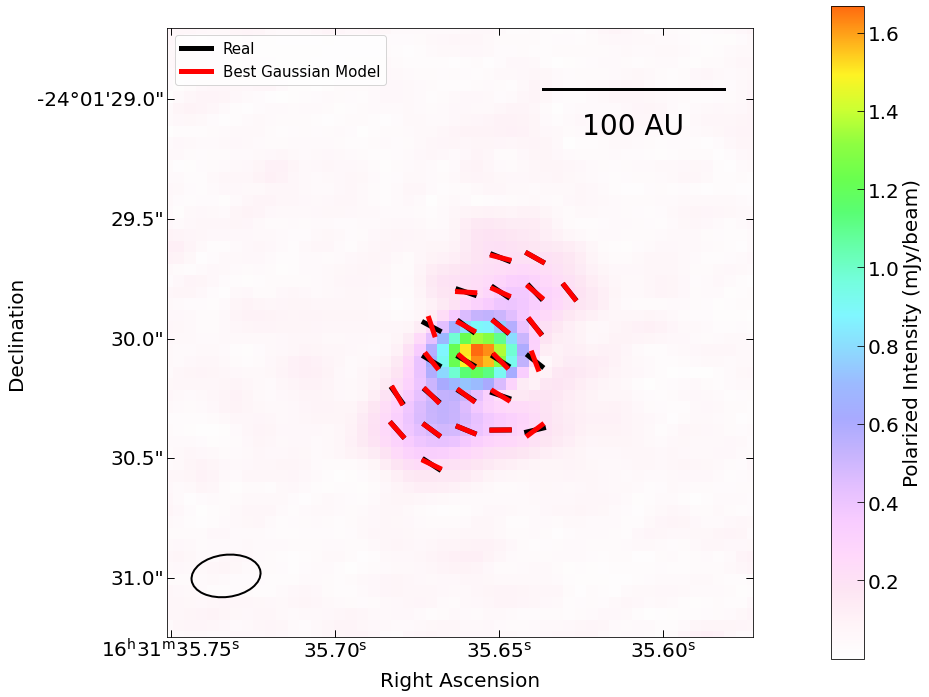

In [39]:
fig, ax = create_base_plot(StokesI_wcs, 
                           POLI_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

first_real = True
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_best:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Best Gaussian Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = legend_text_fs,
         loc = 'upper left')


plt.savefig(writeup_image_folder_path + "IRS63_best_gaussian_BAND7.pdf", 
            dpi=300, 
            bbox_inches='tight')  

In [31]:
POLI_mJy.shape

(540, 540)

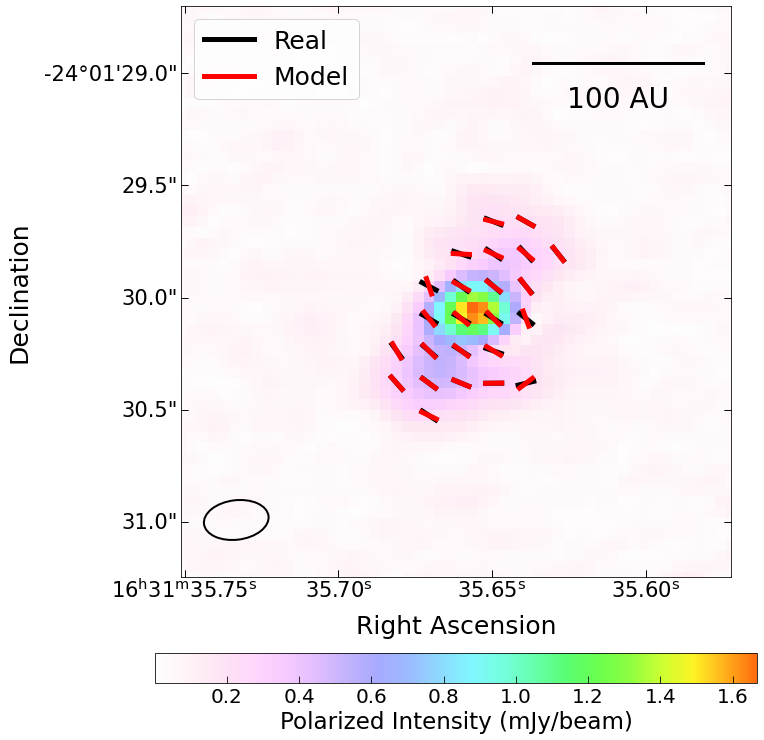

In [32]:
fig, ax = create_base_plot(StokesI_wcs, 
                           POLI_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction,
                           cbar_fs = 23,
                           axis_label_fs = 25,
                           axis_num_fs = 21,
                           cbar_orientation = 'horizontal',
                           cbar_pad = 0.1,
                           cbar_shrink = 0.9,
                           fig_size_x = 12,
                           fig_size_y = 14)


first_real = True
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_best:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = 25,
         loc = 'upper left')


plt.savefig(slideshow_image_folder_path + "IRS63_best_gaussian_BAND7_slides.jpeg", 
            dpi=300, 
            bbox_inches='tight')  

## Average POLF when Scattering

In [33]:
POLF_average = get_average_POLF_where_scattered(GaussianUniformRatios_best, POLF, tolerance = 0.03)
print(rf'The average POLF where self-scattering is: {POLF_average:.3f}')

The average POLF where self-scattering is: 0.009


In [34]:
POLF_average * 100

0.875454768538475

## Analyze Gaussian

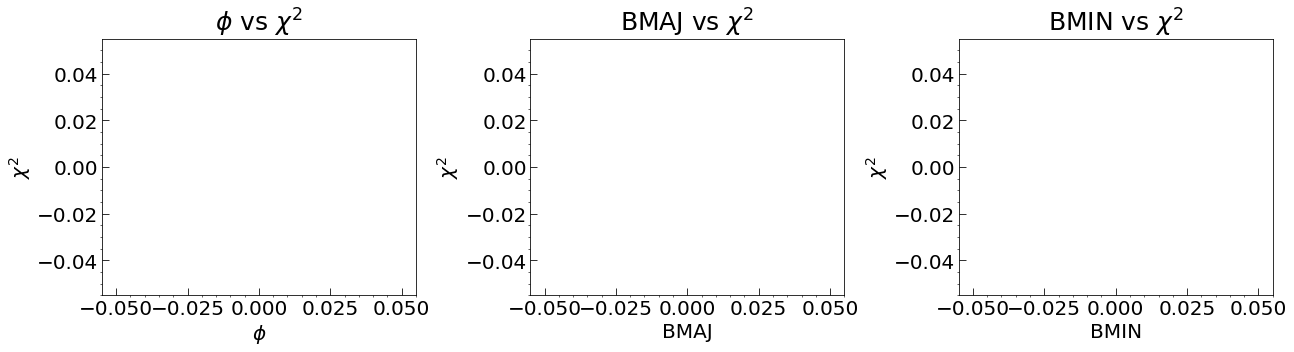

In [35]:
analyze_gaussian_averages_vs_chi2(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix)

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


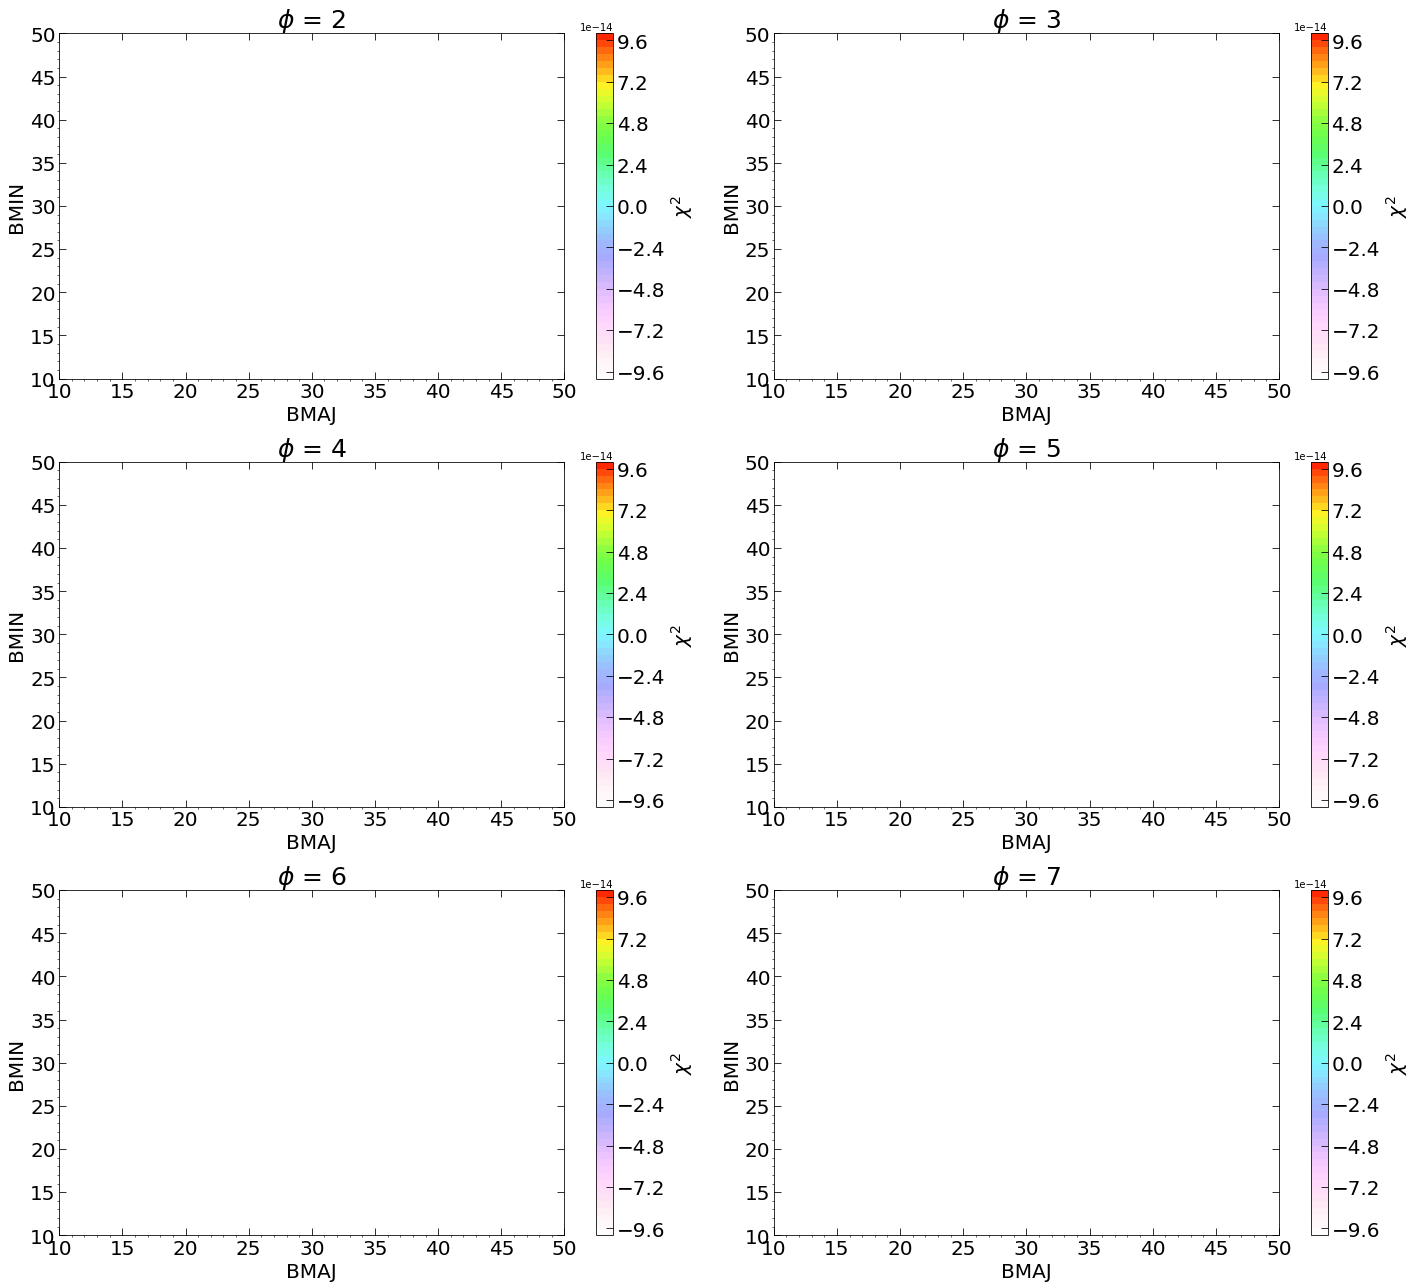

In [36]:
plot_2d_contours_for_gaussian(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix, 'phi', soft_colormap_v2)

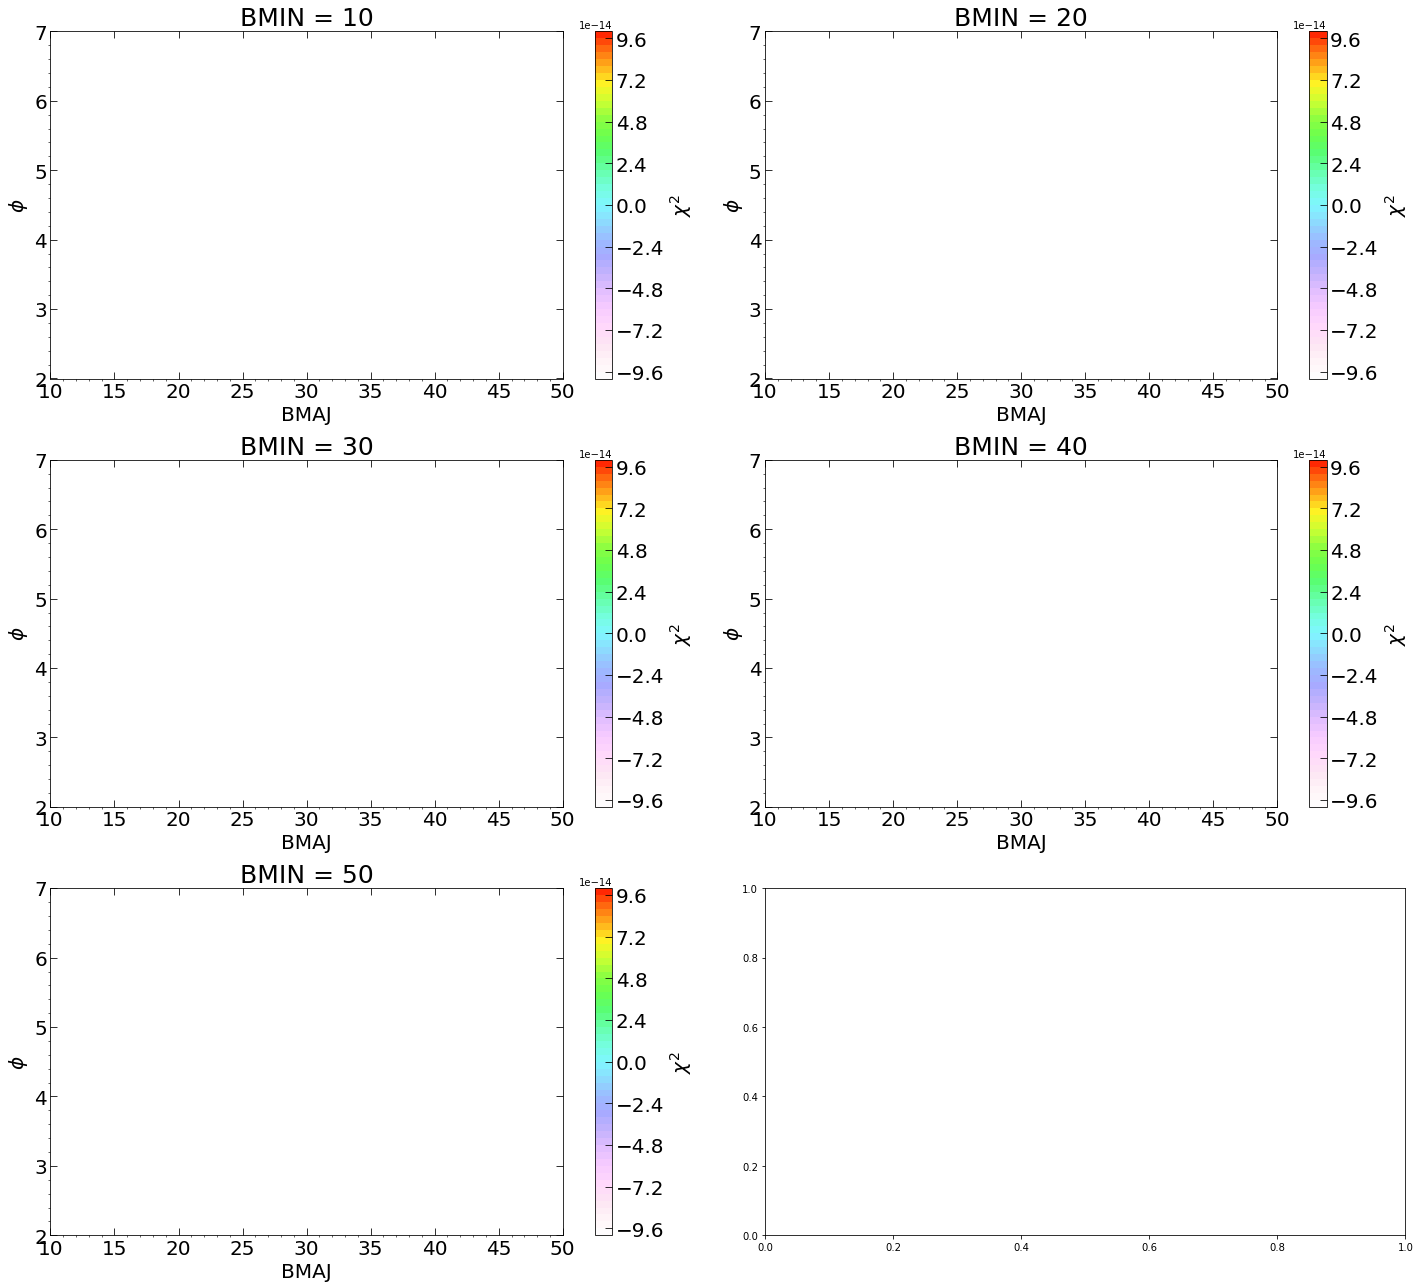

In [37]:
plot_2d_contours_for_gaussian(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix, 'BMIN', soft_colormap_v2)

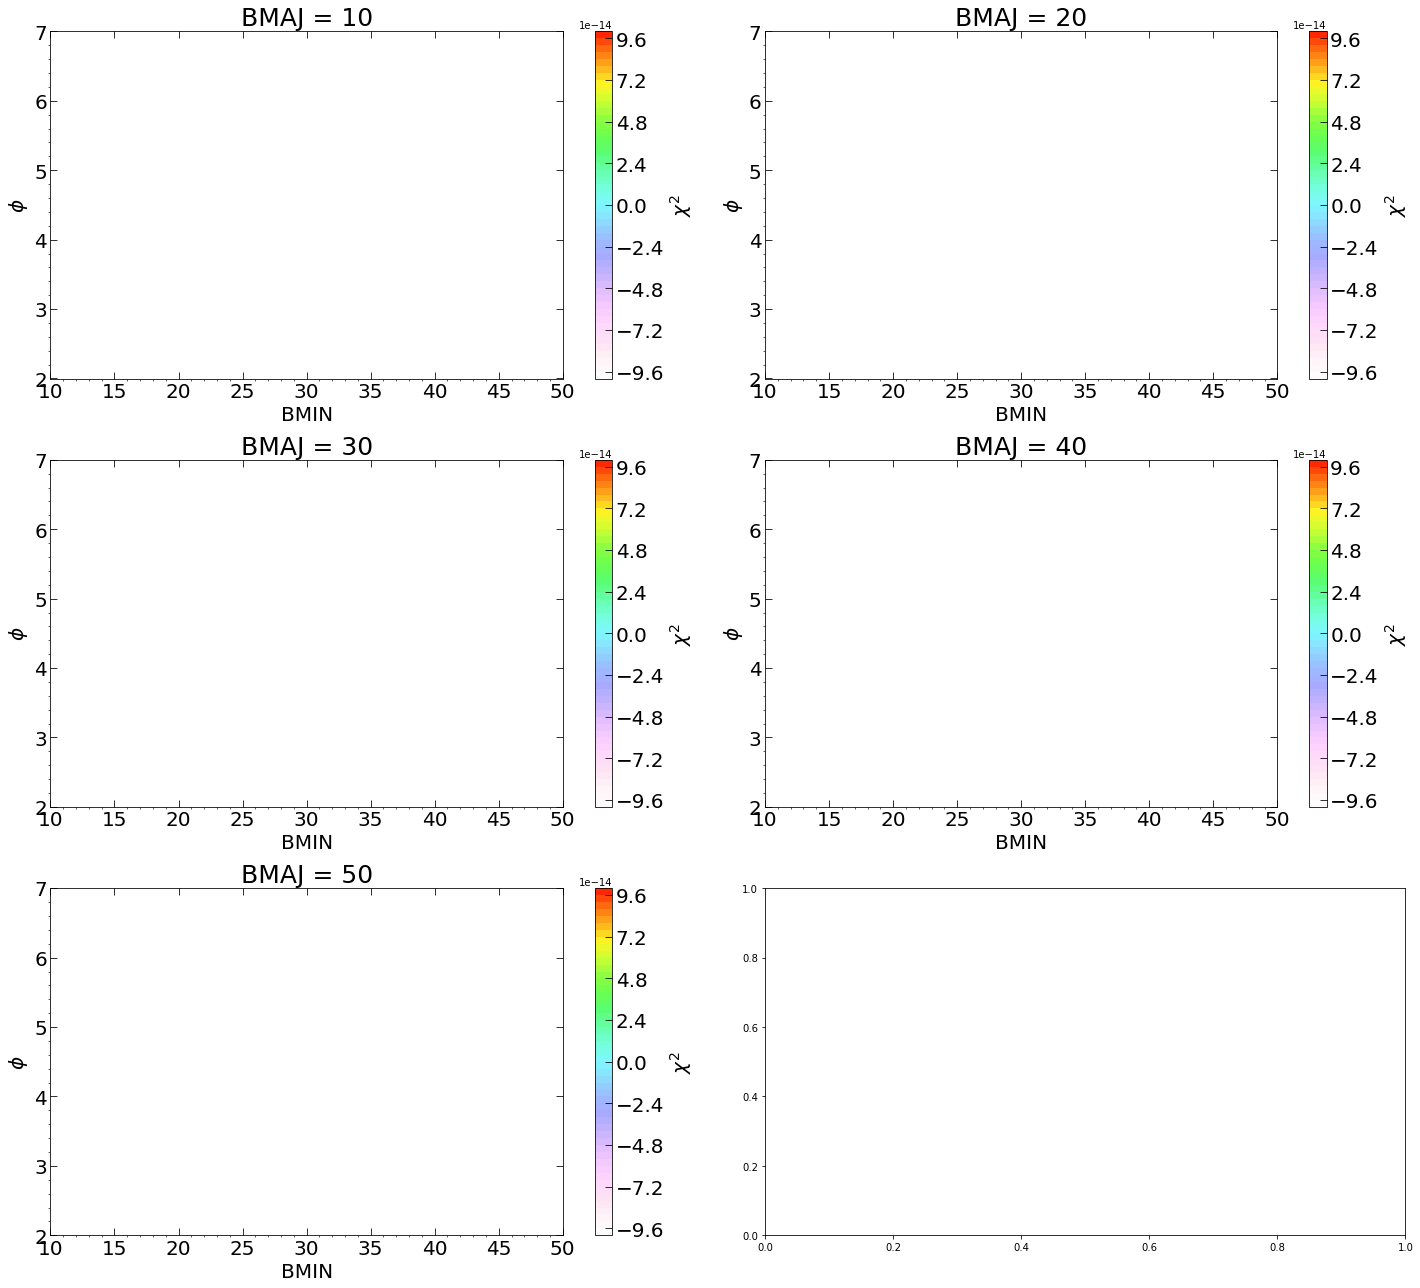

In [38]:
plot_2d_contours_for_gaussian(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix, 'BMAJ', soft_colormap_v2)

##### 